### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [108]:
%matplotlib inline 

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

In [109]:
df = pd.read_csv("vehicle.csv")

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [111]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [112]:
df.dropna(inplace=True,axis=0)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [113]:
df.describe(include='O')

,class
count,813
unique,3
top,car
freq,413


In [114]:
df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [115]:
df[df.isnull()].count()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


> No missing values found


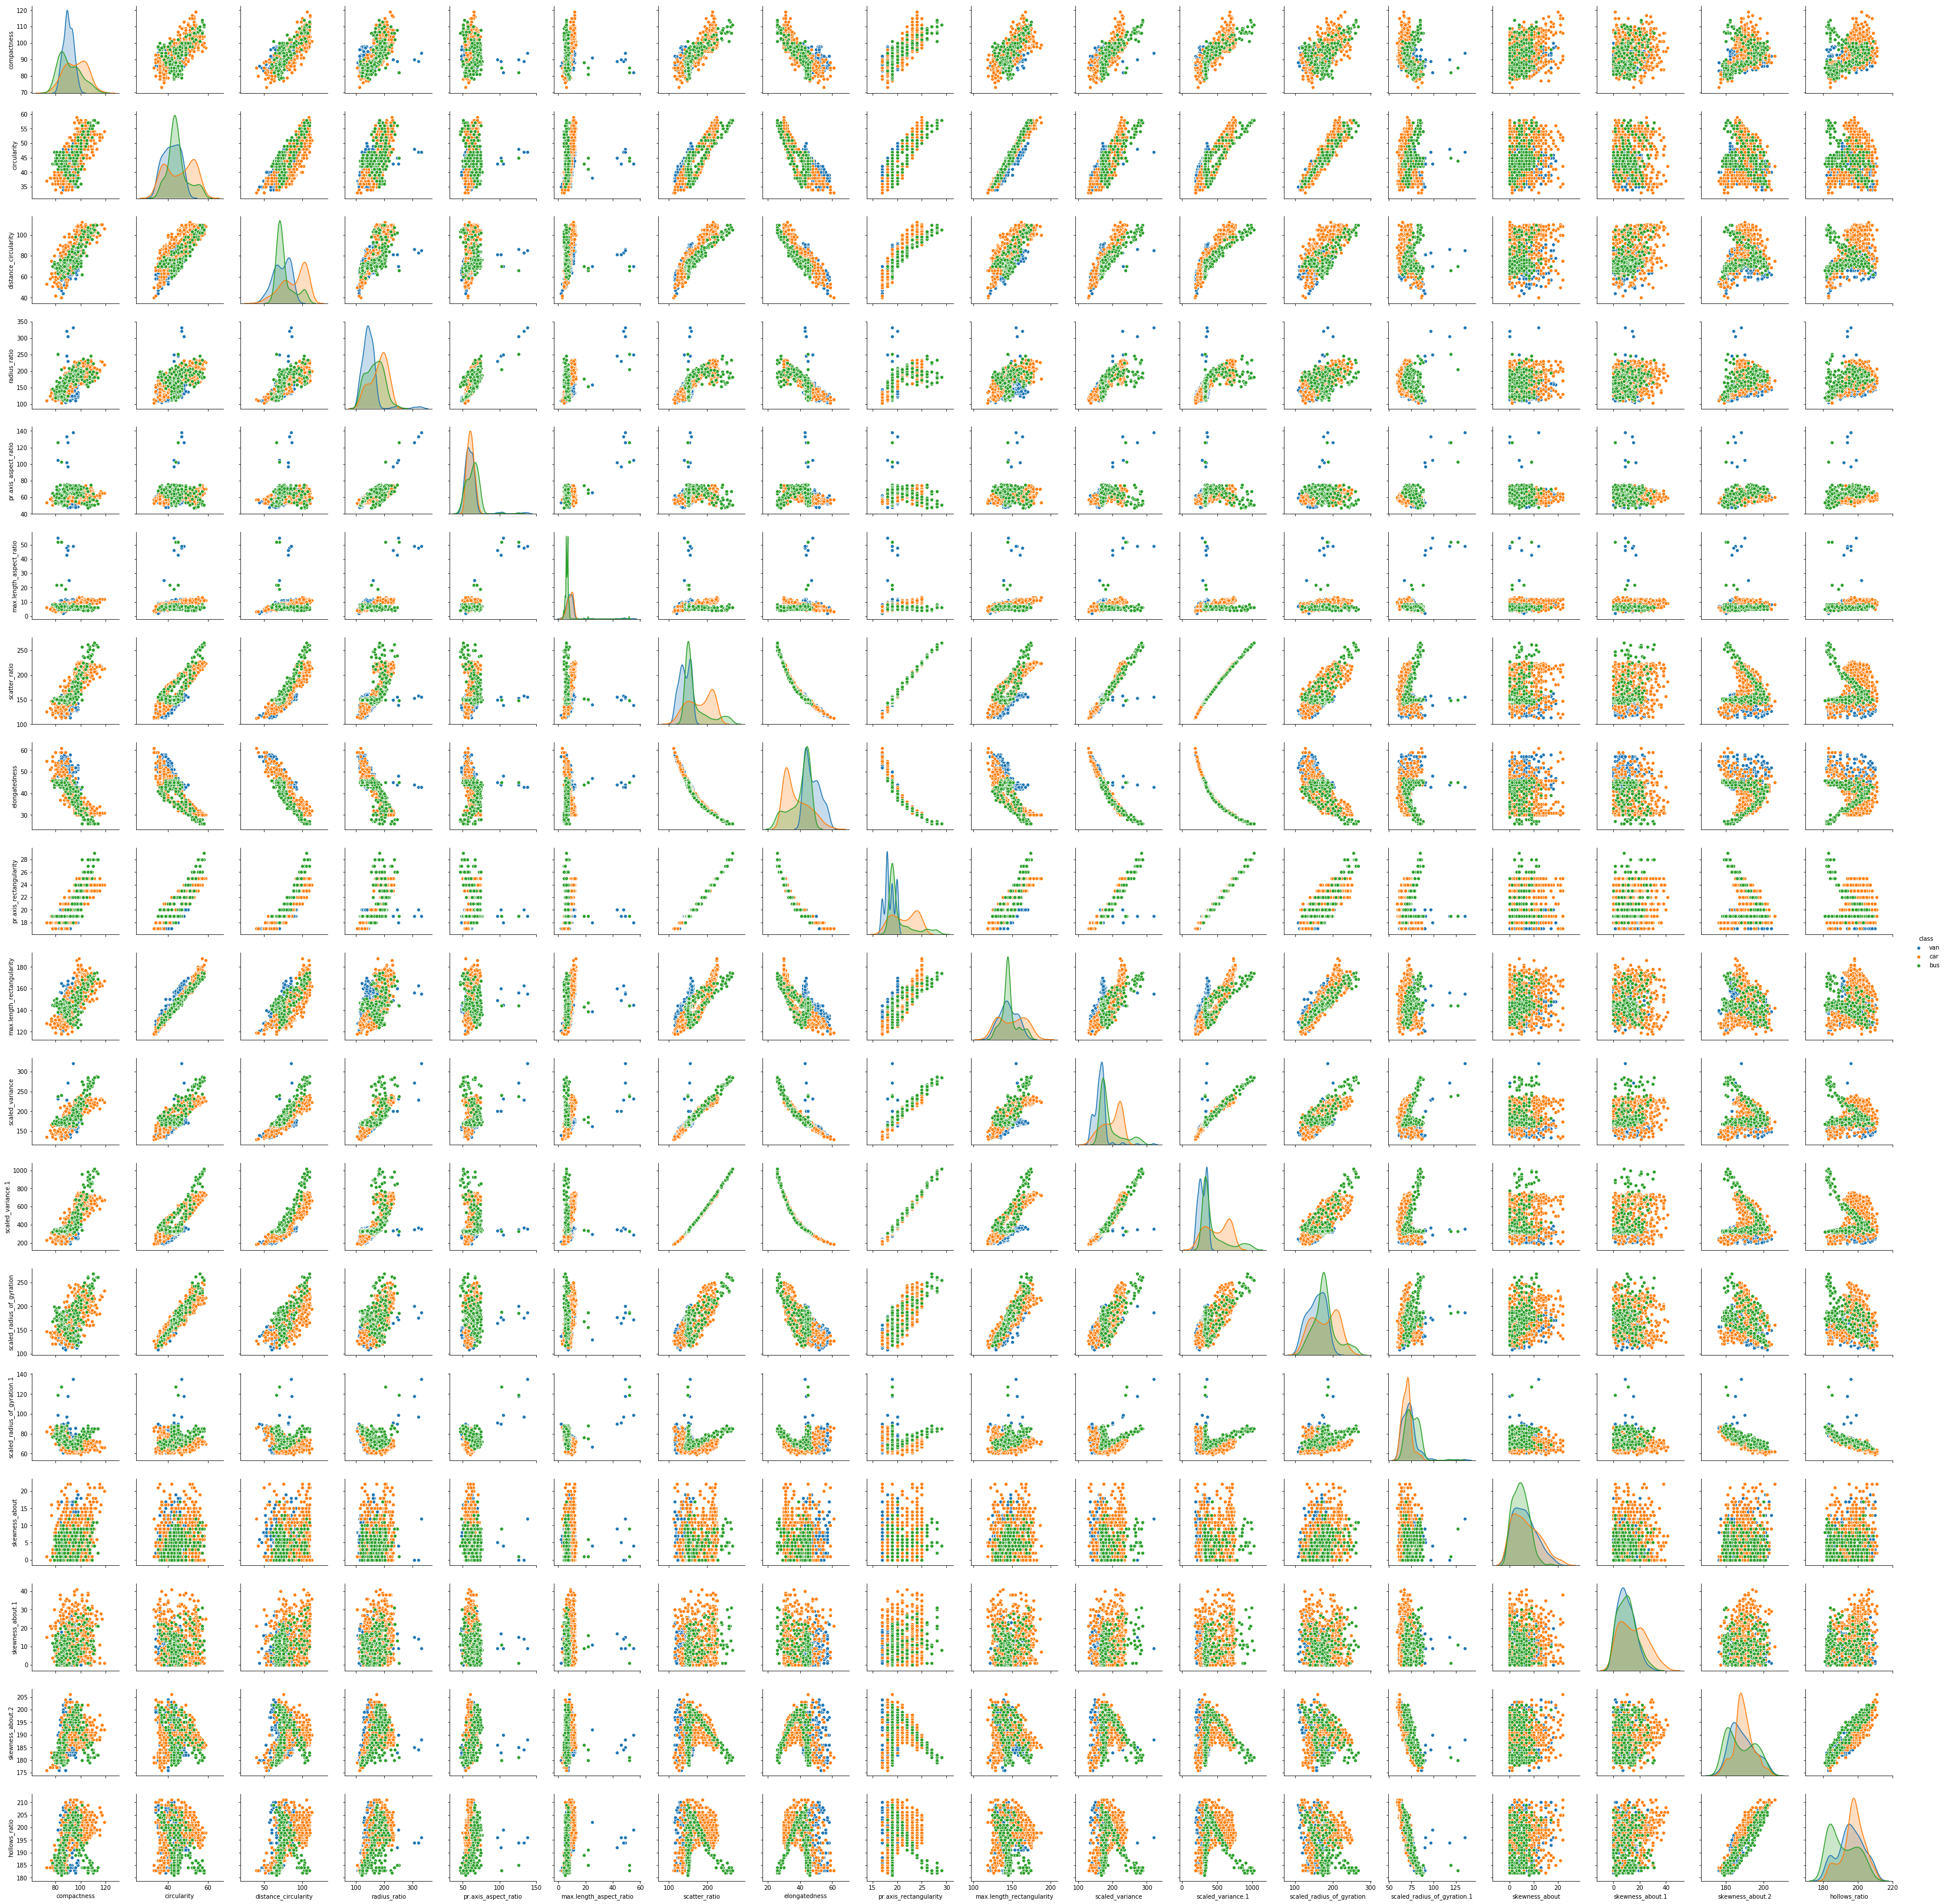

In [116]:
# Generate Scatter Plot to see distribution of Data
sns.pairplot(df,diag_kind='kde',hue='class')

### 3. Standardize the data 

In [203]:
# Seperate class (Target Variable)
X = df.copy()
y = X.pop('class')

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [204]:
# Calculate Z score for each column
from scipy.stats import zscore
X = X.apply(zscore)

## X = (X-X.mean())/X.std() - We could have also used this farmula for calculating Z score


In [123]:
X.iloc[:5,:] # Check if the values have been converted to Z score

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### 4. Assign a dummy array called distortion

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [159]:
distortion = []
cluster_sil_score = []
cluster_range = range (2,10)

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [160]:
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=5)
    clusters.fit(X)
    labels = clusters.labels_
    centriods = clusters.cluster_centers_
    distortion.append(clusters.inertia_)
    cluster_sil_score.append(metrics.silhouette_score(X,labels,metric='euclidean'))

In [161]:
cluster_df = pd.DataFrame({"num_clusters":cluster_range,"Distortion":distortion,"avg_sil_score":cluster_sil_score})
cluster_df[0:15]

,num_clusters,Distortion,avg_sil_score
0,2,8623.136976,0.389788
1,3,7037.287609,0.290468
2,4,5741.223045,0.305360
3,5,5193.019499,0.241587
4,6,4706.497704,0.213370
5,7,4356.901587,0.219487
6,8,4089.997190,0.216948
7,9,3846.676599,0.206867


### 6. Plotting Elbow/ Scree Plot

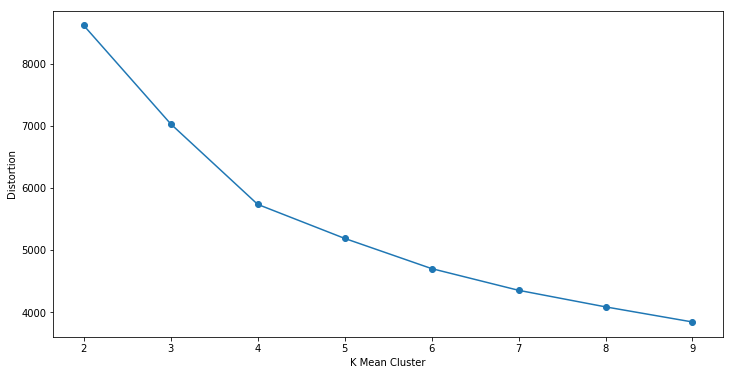

In [169]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( cluster_df.num_clusters, cluster_df.Distortion, marker = "o" )
plt.ylabel("Distortion")
plt.xlabel("K Mean Cluster")
plt.show()

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

In [ ]:
## From the graph, 4 seems to the right value for K

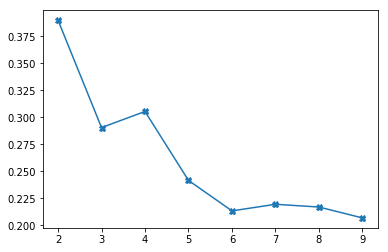

In [168]:
plt.plot(cluster_df.num_clusters, cluster_df.avg_sil_score, marker = 'X' )

In [ ]:
# 4 seems to the right number of natural cluster 

### Find out the optimal value of K

In [ ]:
# Optimal value of K is 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [ ]:
clusters = KMeans(4,n_init=5, random_state=2)
clusters.fit(X)
labels = clusters.labels_
centriods = clusters.cluster_centers_
distortion.append(clusters.inertia_)
cluster_sil_score.append(metrics.silhouette_score(X,labels,metric='euclidean'))

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [216]:
centriods

array([[ 1.15442786e+00,  1.18428647e+00,  1.21198691e+00,
         9.73321772e-01,  9.49213388e-02,  2.18659142e-01,
         1.29796844e+00, -1.21424667e+00,  1.30184458e+00,
         1.09830595e+00,  1.20590258e+00,  1.30898668e+00,
         1.09121291e+00, -1.07878646e-01,  1.68326262e-01,
         2.67954844e-01,  4.67043879e-03,  1.90327006e-01],
       [-9.16832565e-01, -5.26197142e-01, -8.87660194e-01,
        -1.08730080e+00, -5.63171965e-01, -3.01082567e-01,
        -7.80129512e-01,  8.67496080e-01, -7.46976617e-01,
        -4.90093382e-01, -8.01399405e-01, -7.84100480e-01,
        -3.93621965e-01,  7.79115435e-01, -9.18548921e-02,
        -2.83968154e-01, -1.04336571e+00, -1.09942461e+00],
       [-2.25338256e-01, -5.74342724e-01, -3.07614353e-01,
        -3.81865644e-02,  1.81774089e-01, -1.72461386e-01,
        -4.55562374e-01,  3.20123317e-01, -4.83943612e-01,
        -5.36605811e-01, -4.20567716e-01, -4.60232777e-01,
        -6.03827964e-01, -6.44323227e-01, -6.09955778e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [217]:
centriod_df = pd.DataFrame(centriods,columns = X.columns)
centriod_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
1,-0.916833,-0.526197,-0.887660,-1.087301,-0.563172,-0.301083,-0.780130,0.867496,-0.746977,-0.490093,-0.801399,-0.784100,-0.393622,0.779115,-0.091855,-0.283968,-1.043366,-1.099425
2,-0.225338,-0.574343,-0.307614,-0.038187,0.181774,-0.172461,-0.455562,0.320123,-0.483944,-0.536606,-0.420568,-0.460233,-0.603828,-0.644323,-0.060996,0.004548,0.824842,0.707985
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [225]:
df.groupby('labels').count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
labels,,,,,,,,,,,,,,,,,,,
0,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256
1,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
2,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309
3,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [257]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [264]:
d = np.concatenate((a,b,c),axis = 0)

### 9. Combine all three arrays a,b,c into a dataframe

In [268]:
df_new = pd.DataFrame(d,columns=['col1','col2'])

In [269]:
df_new

,col1,col2
0,8.245785,1.385858
1,10.741753,-0.826821
2,13.409569,-1.109832
3,8.588765,-4.199705
4,8.381557,2.090013
5,9.520083,2.223814
6,8.316371,0.019557
7,9.753829,-2.907576
8,10.326737,2.157138
9,12.890713,1.128443


### 10. Use scatter matrix to print all the 3 distributions

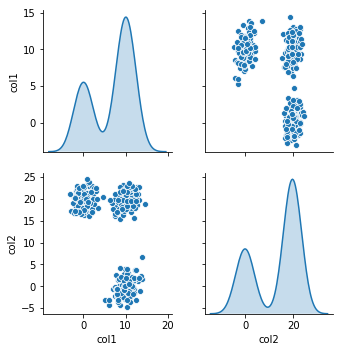

In [283]:
sns.pairplot(df_new,diag_kind='kde')

### 11. Find out the linkage matrix

In [285]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster

from scipy.spatial.distance import pdist

Use ward as linkage metric and distance as Eucledian

In [284]:
Z = linkage(df_new, 'ward',metric='euclidean')
c, coph_dists = cophenet(Z , pdist(df_new))
c

0.9584725044040202

### 12. Plot the dendrogram for the consolidated dataframe

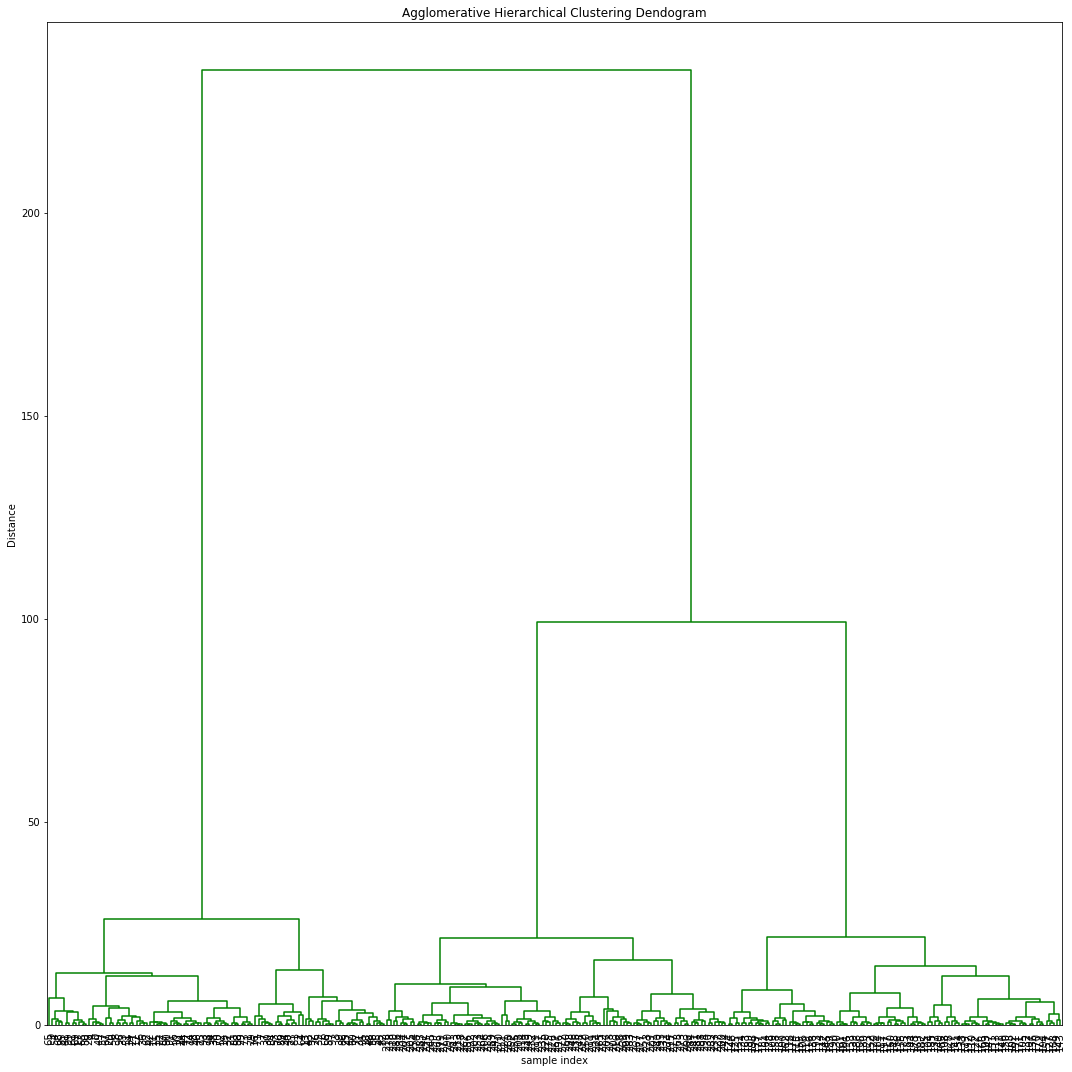

In [275]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

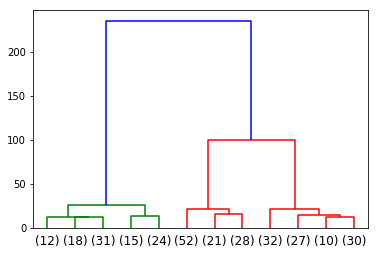

In [276]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [287]:
# 
t= 50

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [292]:
fc = fcluster(Z,t, criterion='distance')

### Use matplotlib to visually observe the clusters in 2D space 

In [299]:
df_new['cluster'] = fc

In [302]:
#sns.pairplot(df_new,diag_kind='kde',hue='cluster')

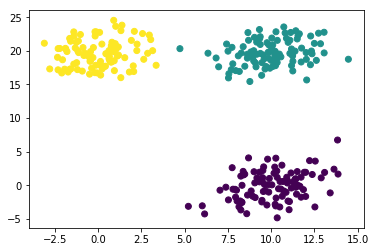

In [301]:
plt.scatter(df_new.col1,df_new.col2,c=df_new.cluster)